In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

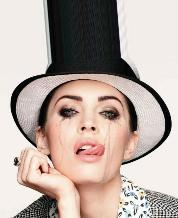

In [5]:
with Image.open(r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\celeba\img\73.jpg') as im:
    display(im)


In [6]:
path = r'C:\\Users\\salda\\Documents\\Tanulas\\4th_year\\ELEC0134_AMLS1\\dataset_AMLS_22-23\\celeba\\img\\'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'\\'+img)
        
print('Images: ',len(img_names))

Images:  5000


In [7]:
# Creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  5000
Rejects: 0


In [8]:
# Converting list to a DataFrame
df = pd.DataFrame(img_sizes)

# Running summary statistics on image widths
df[0].describe()

count    5000.0
mean      178.0
std         0.0
min       178.0
25%       178.0
50%       178.0
75%       178.0
max       178.0
Name: 0, dtype: float64

In [9]:
# Running summary statistics on image heights
df[1].describe()

count    5000.0
mean      218.0
std         0.0
min       218.0
25%       218.0
50%       218.0
75%       218.0
max       218.0
Name: 1, dtype: float64

## Image sizes match up

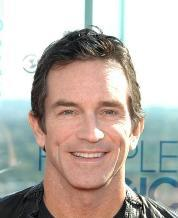

In [13]:
man = Image.open(r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\celeba\img\37.jpg')
display(man)

torch.Size([3, 218, 178])


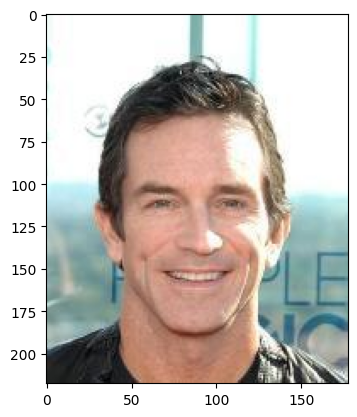

In [14]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(man)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


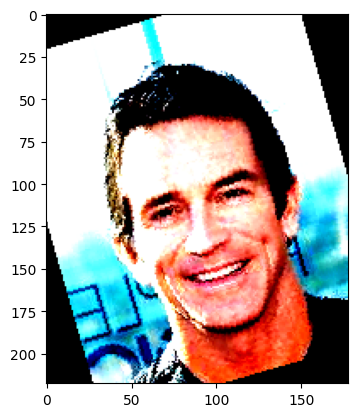

In [18]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomRotation(30), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
im = transform(man)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [4]:
label_file = r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\celeba\labels.xlsx'
genders= pd.read_excel(label_file, usecols=[2], names=['gender'])['gender'].tolist()
sum(genders)

0

As the sum in genders = 0. The dataset is perfectly balanced.

In [5]:
label_file = r'C:\Users\salda\Documents\Tanulas\4th_year\ELEC0134_AMLS1\dataset_AMLS_22-23\celeba\labels.xlsx'
smiling= pd.read_excel(label_file, usecols=[3], names=['smiling'])['smiling'].tolist()
sum(smiling)

0

As the sum of smiling = 0 the dataset is perfectly balanced.